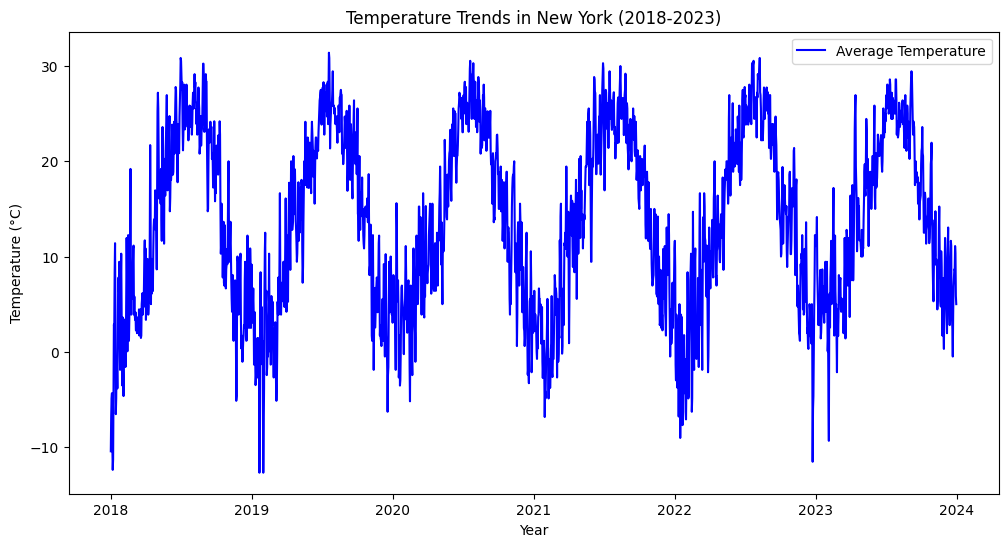

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NOAA climate data
file_path = "/content/3941605.csv"  # 👉 Replace with your actual CSV file name
df = pd.read_csv(file_path)

# Data preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert DATE column to datetime format
df.set_index('DATE', inplace=True)  # Set DATE as index

# Compute TAVG if missing
df['TAVG'] = df['TAVG'].fillna((df['TMAX'] + df['TMIN']) / 2)

# Visualize temperature trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TAVG'], label='Average Temperature', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends in New York (2018-2023)')
plt.legend()
plt.show()


📊 Decision Tree Error Analysis
MAE: 3.014350797266514
MSE: 15.531594533029615
RMSE: 3.9410144040626918

📊 Random Forest Error Analysis
MAE: 2.5062414578587706
MSE: 10.789477285876993
RMSE: 3.2847339749022284



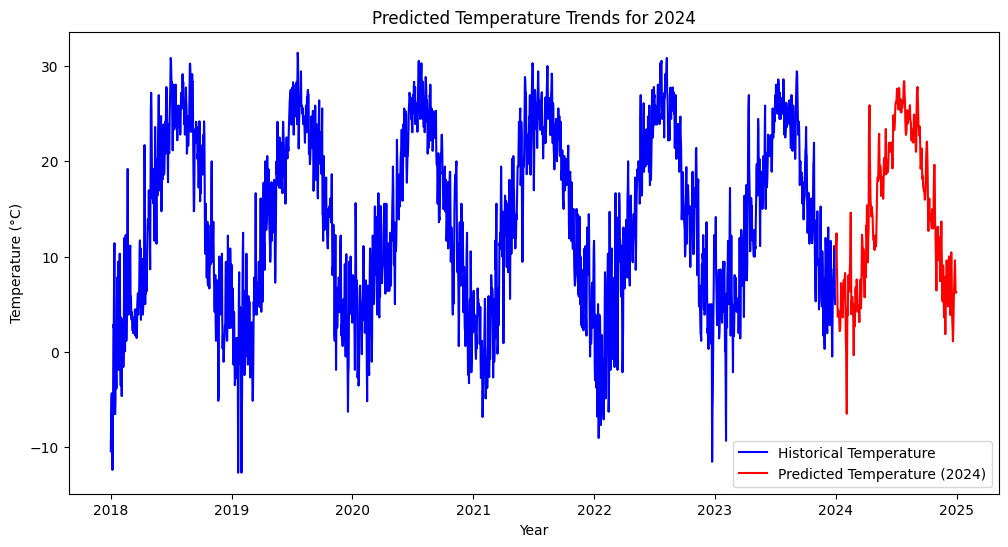

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Feature engineering
df['Year'] = df.index.year  # Extract year
df['DayOfYear'] = df.index.dayofyear  # Extract day of the year

# Select features and target variable
X = df[['Year', 'DayOfYear']]
y = df['TAVG']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model evaluation
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE manually

    print(f"📊 {name} Error Analysis")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("")

evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Predict future temperature for 2024
future_dates = pd.DataFrame({
    'Year': [2024] * 366,  # Ensure 366 days for a leap year
    'DayOfYear': list(range(1, 367))
})
future_predictions = rf_model.predict(future_dates)

# Visualize predicted temperature trends for 2024
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TAVG'], label='Historical Temperature', color='blue')
plt.plot(pd.date_range("2024-01-01", "2024-12-31"), future_predictions, label='Predicted Temperature (2024)', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Predicted Temperature Trends for 2024')
plt.legend()
plt.show()
